In [1]:
import pandas as pd
import numpy as np
import scikit_posthocs as sp
import Orange
import seaborn as sns; sns.set()
import matplotlib.pyplot as plt
from autorank import autorank, plot_stats, create_report, latex_table

# Lendo resultados de Validação

In [2]:
resultados = pd.read_csv('../validation_results.csv').drop(['Unnamed: 0'],axis=1)
resultados

,CLASSIFIER,EMBEDDER,PRECISION,RECALL,F1SCORE,TIME
0,KNN,TFIDF,0.586269,0.586269,0.586269,8.590708
1,KNN,PRETRAINED,0.576332,0.576332,0.576332,9.957644
2,KNN,TRAINED,0.580397,0.580397,0.580397,5.361411
3,SVM,TFIDF,0.116983,0.116983,0.116983,658.436923
4,SVM,PRETRAINED,0.121048,0.121048,0.121048,137.842464
...,...,...,...,...,...,...
85,SVM,PRETRAINED,0.111161,0.111161,0.111161,126.038186
86,SVM,TRAINED,0.523723,0.523723,0.523723,95.171705
87,MLP,TFIDF,0.812020,0.812020,0.812020,2531.164760
88,MLP,PRETRAINED,0.629914,0.629914,0.629914,208.423105


### Separando por tipo de medida

In [3]:
precisions_lists = []
f1scores_lists = []
recall_lists = []
columns = []
for clf in resultados.CLASSIFIER.unique():
    for emb in resultados.EMBEDDER.unique():
        columns.append(clf+"_"+emb)
        f1scores_lists.append(resultados[(resultados.CLASSIFIER == clf) & (resultados.EMBEDDER == emb)].F1SCORE.tolist())
        precisions_lists.append(resultados[(resultados.CLASSIFIER == clf) & (resultados.EMBEDDER == emb)].PRECISION.tolist())
        recall_lists.append(resultados[(resultados.CLASSIFIER == clf) & (resultados.EMBEDDER == emb)].RECALL.tolist())
f1score = pd.DataFrame(columns=columns, data=np.array(f1scores_lists).T)
precision = pd.DataFrame(columns=columns, data=np.array(precisions_lists).T)
recall = pd.DataFrame(columns=columns, data=np.array(recall_lists).T)

## Gráfico de F1-Score Médio

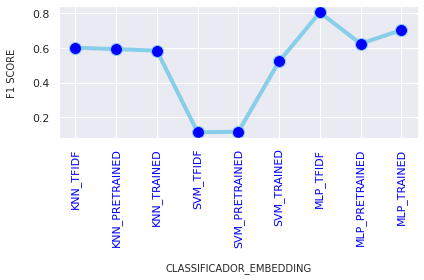

In [4]:
f1T = f1score.T.reset_index()
f1T['average'] = f1T.mean(axis=1)

plt.plot( 'index', 'average', data=f1T, marker='o', markerfacecolor='blue', markersize=12, color='skyblue', linewidth=4)
plt.xlabel('CLASSIFICADOR_EMBEDDING', fontsize=10, labelpad=15)
plt.ylabel('F1 SCORE', fontsize=10, labelpad=15)

plt.xticks(rotation=90, color='blue')
plt.tight_layout()
plt.gcf()
plt.savefig('f1score_mean.png', bbox_inches = "tight")
plt.show()
# plt.legend()


# Testes de Hipóteses

Citar:
- https://www.theoj.org/joss-papers/joss.02173/10.21105.joss.02173.pdf
- http://citeseerx.ist.psu.edu/viewdoc/download?doi=10.1.1.141.3142&rep=rep1&type=pdf

In [5]:
result = autorank(f1score, alpha=0.05, verbose=False)
print(result)
print("#############################################################################################")
create_report(result)

RankResult(rankdf=
                meanrank      mean         std  ci_lower  ci_upper  \
MLP_TFIDF            1.0  0.805938  0.00747454  0.797377  0.814499   
MLP_TRAINED          2.0  0.703507  0.00843742  0.693843  0.713171   
MLP_PRETRAINED       3.0  0.624571  0.00688802  0.616682   0.63246   
KNN_TFIDF            4.1  0.601709  0.00914056   0.59124  0.612178   
KNN_PRETRAINED       5.2  0.593124   0.0126524  0.578632  0.607615   
KNN_TRAINED          5.7  0.584674   0.0117553   0.57121  0.598138   
SVM_TRAINED          7.0  0.522185    0.010734  0.509891  0.534479   
SVM_PRETRAINED       8.0  0.115037  0.00392002  0.110547  0.119527   
SVM_TFIDF            9.0  0.112055  0.00382062  0.107679  0.116431   

               effect_size   magnitude  
MLP_TFIDF                0  negligible  
MLP_TRAINED        12.8512       large  
MLP_PRETRAINED     25.2345       large  
KNN_TFIDF          24.4609       large  
KNN_PRETRAINED     20.4804       large  
KNN_TRAINED        22.4627       l

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  


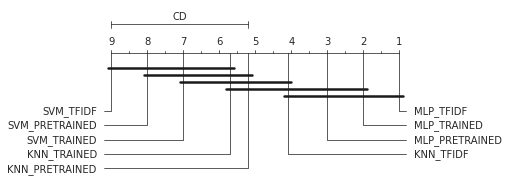

In [6]:
plot_stats(result)
plt.tight_layout()
plt.gcf()
plt.savefig('cd_diagram.png', bbox_inches = "tight")
plt.show()

In [7]:
latex_table(result)

\begin{table}[h]
\centering
\begin{tabular}{lrlllll}
\toprule
{} &    MR &     M &    SD &              CI &     \$d\$ &   Magnitude \\
\midrule
MLP\_TFIDF      & 1.000 & 0.806 & 0.007 &  [0.797, 0.814] &   0.000 &  negligible \\
MLP\_TRAINED    & 2.000 & 0.704 & 0.008 &  [0.694, 0.713] &  12.851 &       large \\
MLP\_PRETRAINED & 3.000 & 0.625 & 0.007 &  [0.617, 0.632] &  25.234 &       large \\
KNN\_TFIDF      & 4.100 & 0.602 & 0.009 &  [0.591, 0.612] &  24.461 &       large \\
KNN\_PRETRAINED & 5.200 & 0.593 & 0.013 &  [0.579, 0.608] &  20.480 &       large \\
KNN\_TRAINED    & 5.700 & 0.585 & 0.012 &  [0.571, 0.598] &  22.463 &       large \\
SVM\_TRAINED    & 7.000 & 0.522 & 0.011 &  [0.510, 0.534] &  30.679 &       large \\
SVM\_PRETRAINED & 8.000 & 0.115 & 0.004 &  [0.111, 0.120] & 115.767 &       large \\
SVM\_TFIDF      & 9.000 & 0.112 & 0.004 &  [0.108, 0.116] & 116.899 &       large \\
\bottomrule
\end{tabular}
\caption{Summary of populations}
\label{tbl:stat_results}
\end{t